In [1]:
import pandas as pd
df = pd.read_csv('../../data/preprocessed_AQI_data.csv')
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,130,10126,51,2,1,0,36,0,0,0,51,2,44.7444,44.2031
1,22,10140,41,0,1,0,5,0,1,0,41,0,-5.2900,-44.4900
2,75,10163,66,2,1,0,39,0,2,0,66,2,37.1667,15.1833
3,123,10185,34,0,1,0,34,0,0,0,20,0,53.0167,20.8833
4,166,10243,54,2,1,0,14,0,11,0,54,2,16.1005,-88.8074


In [2]:
from sklearn.model_selection import train_test_split

# shuffle the data before splitting
df_shuffled = df.sample(frac=1, random_state=19)  
X = df_shuffled.drop(["AQI Category"], axis=1)
y = df_shuffled["AQI Category"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=22
)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(2845, 13) (11384, 13)
(2845,) (11384,)


In [3]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Instantiate Support Vector Classifier
svm_classifier = SVC(kernel='linear')  # You can choose different kernels like 'rbf', 'poly', etc.

# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)


SVM Accuracy: 0.9910400562192551


In [4]:
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [5]:
param_grid = {
    'C': [0.1, 1],  # Regularization parameter
    'gamma': [0.1, 1],  # Kernel coefficient for 'rbf', 'poly', 'sigmoid'
    'kernel': ['rbf', 'sigmoid', 'linear']
}

svm_classifier = SVC()
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   2.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   0.5s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   0.9s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   0.9s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   1.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.5s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   2.7s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.5s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.3s
[CV] END ...................

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1], 'gamma': [0.1, 1],
                         'kernel': ['rbf', 'sigmoid', 'linear']},
             verbose=2)

best params 
{'C': 0.1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.1,
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [12]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Best Score: 0.9912136396443662


In [10]:
svm_model2 = SVC(**grid_search.best_params_)
svm_model2.get_params()

{'C': 0.1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.1,
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [13]:
svm_model2.fit(X_train, y_train)



SVC(C=0.1, gamma=0.1, kernel='linear')

In [14]:

# Make predictions
y_preds= svm_model2.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_preds)
print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.9938510189739986


Confusion Matrix:
[[5300    0    1    0    0    0]
 [   0   38    0    0    0    3]
 [   2    0 4723    0   16    0]
 [   0    0    0  611    2    5]
 [   0    0    8   17  563    0]
 [   0    4    0   12    0   79]]


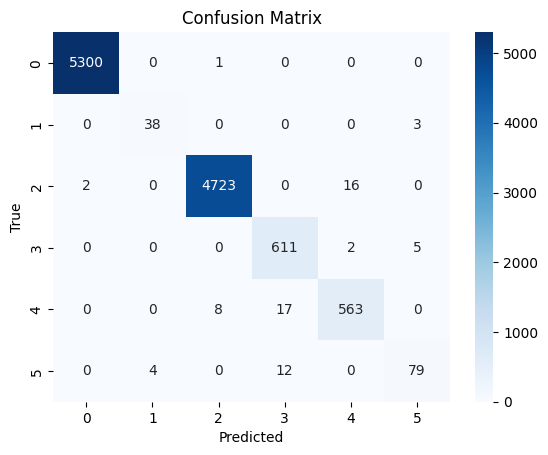

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_preds)
print("Confusion Matrix:")
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()